In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
train = pd.read_csv('train_iris.csv')
X_train = train.drop(['Unnamed: 0', 'species'], axis=1)
y_train = train['species']


test = pd.read_csv('test_iris.csv')
X_test = test.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test['species']

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(0)


# DataFrame for saving results
scores = pd.DataFrame(columns=['depth', 'train', 'test', 'cross-val mean'])

for i in range(1, 100):
      clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
      cross_val_acc = cross_val_score(clf, X_train, y_train, cv=5).mean()
      clf.fit(X_train, y_train)
      train_acc = clf.score(X_train, y_train)
      test_acc = clf.score(X_test, y_test)
      scores.loc[len(scores)] = [i, train_acc, test_acc, cross_val_acc]


scores = pd.melt(scores, id_vars=['depth'], value_vars=['train', 'test', 'cross-val mean'],
                 var_name='type', value_name='score')
scores.sample(3)

,depth,type,score
60,61.0,train,1.00
143,45.0,test,0.92
257,60.0,cross-val mean,0.96


<AxesSubplot:xlabel='depth', ylabel='score'>

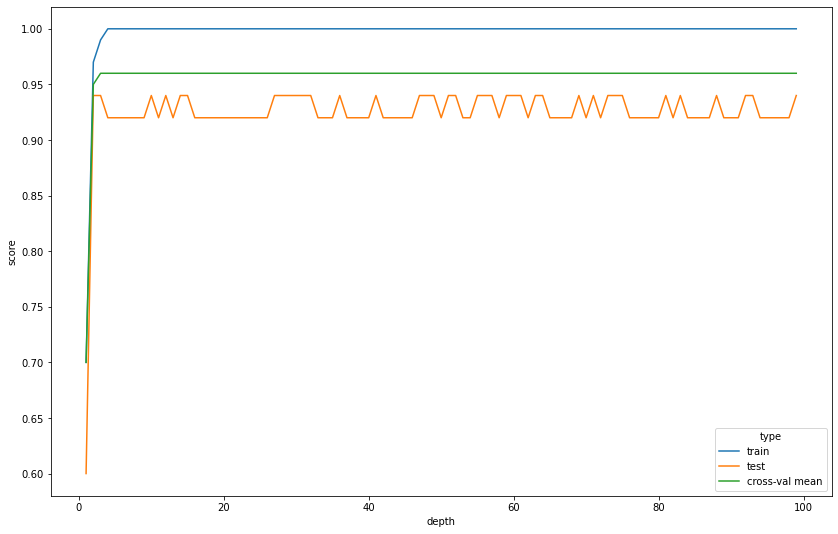

In [16]:
plt.figure(figsize=(14, 9))
sns.lineplot(x='depth', y='score', hue='type', data=scores)

# Индивидуальное задание

In [23]:
data = pd.read_csv('dogs_n_cats.csv')
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [25]:
X_train = data.drop(['Вид'], axis=1)

# convert to numeric
data['Вид'] = pd.Categorical(data['Вид'])
y_train = data['Вид'].cat.codes

y_train

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int8

In [29]:
from sklearn.model_selection import GridSearchCV

params={'max_depth': np.arange(1, 100, 1)}
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), params)
clf.fit(X_train, y_train)
best_clf = clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [39]:
data = pd.read_json('vertopal.com_dataset_209691_15.json')
X_test = data

y_pred = clf.predict(X_test)
len(y_pred[y_pred>0])

59